In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Schools eqao scores
* Data Source : https://www.ontario.ca/data/school-information-and-student-demographics
* File type: xlsx

In [209]:
#Visit URL & download data, save as Excel file

import requests

url="https://files.ontario.ca/opendata/sif_data_table_2017_2018prelim_en_june.xlsx"

myfile = requests.get(url)

output = open('../Data/Schools_EQAO/sif_data_table_2017_2018prelim_en_june.xlsx', 'wb')

output.write(myfile.content)

output.close()

print("Done!")

Done!


In [210]:
# Read excel file

path="../Data/Schools_EQAO/sif_data_table_2017_2018prelim_en_june.xlsx"
schools_eqao=pd.read_excel(path)
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Extract Date
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,N/D,NaN,N/R,NaN,N/R,NaN,22.7,20.5,2019-06-17
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,-36.0,NaN,NaN,NaN,NaN,NaN,NaN,11,56.3,2019-06-17
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-06-17
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,32,31.4,2019-06-17
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-06-17


In [211]:
#Describe data
schools_eqao.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrolment,4819.0,418.172235,304.687226,10.00000,216.000000,346.00000,534.00000,2080.00000
Latitude,4887.0,44.232766,1.436709,41.80695,43.481690,43.77387,44.50844,51.46627
Longitude,4887.0,-79.711127,2.593013,-94.56370,-80.308555,-79.56298,-79.21214,-74.47102
Change in Grade 3 Reading Achievement Over Three Years,3084.0,2.948119,13.878343,-56.00000,-5.000000,3.00000,11.00000,65.00000
Change in Grade 3 Writing Achievement Over Three Years,3086.0,-2.086520,16.039496,-74.00000,-11.000000,-3.00000,7.00000,92.00000
Change in Grade 3 Mathematics Achievement Over Three Years,3134.0,-1.945437,16.200346,-77.00000,-12.000000,-2.00000,7.75000,85.00000
Change in Grade 6 Reading Achievement Over Three Years,2917.0,1.146726,11.355510,-42.00000,-5.000000,1.00000,7.00000,57.00000
Change in Grade 6 Writing Achievement Over Three Years,2917.0,-0.562564,13.019662,-68.00000,-8.000000,0.00000,7.00000,64.00000
Change in Grade 6 Mathematics Achievement Over Three Years,2915.0,-1.553002,16.380268,-69.00000,-11.000000,-1.00000,8.00000,65.00000
Change in Grade 9 Academic Mathematics Achievement Over Three Years,699.0,0.964235,10.739298,-50.00000,-4.000000,1.00000,6.00000,64.00000


In [212]:
# Change dtype of all columns containing 'percentage' to float, remove % sign and convert to .2f, replace 'nan',''NA',
# 'SP' and 'N/D' by 'NaN'. 

for column in schools_eqao.columns:
    if 'Percentage' in column:
        schools_eqao[column].replace(to_replace=['SP','N/D','N/R','NA'],value=np.nan,inplace=True)
        schools_eqao[column]= schools_eqao[column].str.replace(r'%',r'').astype('float')
        
# schools_eqao.fillna(0, inplace=True)

In [213]:
schools_eqao.dtypes

Board Number                                                                                        object
Board Name                                                                                          object
Board Type                                                                                          object
School Number                                                                                       object
School Name                                                                                         object
School Type                                                                                         object
School Special Condition Code                                                                       object
School Level                                                                                        object
School Language                                                                                     object
Grade Range                          

In [214]:
#Drop columns with blank lat and long

# Get names of indexes for which column Latitude is null
indexNames = schools_eqao[ schools_eqao['Latitude'].isnull()].index
 
# Delete these row indexes from dataFrame
schools_eqao.drop(indexNames , inplace=True)

schools_eqao.reset_index(drop=True)

schools_eqao.count()

Board Number                                                                                4887
Board Name                                                                                  4887
Board Type                                                                                  4887
School Number                                                                               4887
School Name                                                                                 4887
School Type                                                                                 4887
School Special Condition Code                                                               4887
School Level                                                                                4887
School Language                                                                             4887
Grade Range                                                                                 4887
Building Suite                

In [215]:
#Insert new column with avg. EQAO scores 
schools_eqao['Avg_EQAO']=\
schools_eqao[['Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',\
              'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'
             ]].mean(axis=1)


In [216]:
#Insert new column with avg. change in EQAO scores 
schools_eqao['Avg_change_EQAO']=\
schools_eqao[['Change in Grade 3 Reading Achievement Over Three Years',\
              'Change in Grade 3 Writing Achievement Over Three Years',\
              'Change in Grade 3 Mathematics Achievement Over Three Years',\
              'Change in Grade 6 Reading Achievement Over Three Years',\
              'Change in Grade 6 Writing Achievement Over Three Years',\
              'Change in Grade 6 Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Academic Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Applied Mathematics Achievement Over Three Years',\
              'Change in Grade 10 OSSLT Literacy Achievement Over Three Years'
             ]].mean(axis=1)

In [217]:
#drop values with NaN Avg EQAO
schools_eqao.dropna(subset=['Avg_EQAO'])

#Delete Columns only when all values are Null
schools_eqao = schools_eqao.dropna(axis=1,how='all')

#Rename Columns    
schools_eqao.columns = schools_eqao.columns.str.replace('Percentage of','Perc')
schools_eqao.columns = schools_eqao.columns.str.replace('Students','stud')

char=[' Whose',' Who',' Is',' Achievement Over Three Years',' to',' Achieving the Provincial Standard in',\
     ' Have',' Some',' Speaking Country',' from']

for char in char:
    schools_eqao.columns = schools_eqao.columns.str.replace(char,'')

In [218]:
schools_eqao.columns

Index(['Board Number', 'Board Name', 'Board Type', 'School Number',
       'School Name', 'School Type', 'School Special Condition Code',
       'School Level', 'School Language', 'Grade Range', 'Building Suite',
       'P.O. Box', 'Street', 'Municipality', 'City', 'Province', 'Postal Code',
       'Phone Number', 'Fax Number', 'School Website', 'Board Website',
       'Enrolment', 'Latitude', 'Longitude',
       'Perc stud First Language Not English',
       'Perc stud First Language Not French',
       'Perc stud Are New Canada a Non-English',
       'Perc stud Are New Canada a Non-French',
       'Perc stud Receiving Special Education Services',
       'Perc stud Identified as Gifted', 'Perc Grade 3 stud Reading',
       'Change in Grade 3 Reading', 'Perc Grade 3 stud Writing',
       'Change in Grade 3 Writing', 'Perc Grade 3 stud Mathematics',
       'Change in Grade 3 Mathematics', 'Perc Grade 6 stud Reading',
       'Change in Grade 6 Reading', 'Perc Grade 6 stud Writing',
     

In [219]:
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 9 Academic Mathematics,Perc Grade 9 stud Applied Mathematics,Change in Grade 9 Applied Mathematics,Perc stud That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy,Perc Children Live in Low-Income Households,Perc stud Parents University Education,Extract Date,Avg_EQAO,Avg_change_EQAO
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,NaN,NaN,NaN,NaN,22.7,20.5,2019-06-17,NaN,NaN
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,11.0,56.3,2019-06-17,59.666667,-23.166667
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-06-17,68.666667,22.000000
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,32.0,31.4,2019-06-17,41.333333,-24.333333
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-06-17,45.500000,-14.833333


## Put cleaned dataframe in MySql db

In [220]:
from sqlalchemy import *
from sqlalchemy.schema import CreateSchema
import pymysql
from config import username,pwd,host
import pymongo

#database connection
metadata = MetaData()
engine = create_engine(f'mysql+pymysql://{username}:{pwd}@{host}:3306')
engine.execute(CreateSchema('Schools'))

In [221]:
engine.execute("USE Schools")
schools_eqao.to_sql(name='schools_data', con=engine, if_exists = 'replace', index=False)

# Twitter

In [222]:
from bs4 import BeautifulSoup
import requests
from splinter import Browser


url = 'https://mobile.twitter.com/tdsb'

# Retrieve page with the requests module
response = requests.get(url)

# Create BeautifulSoup object; parse with 'lxml'
soup = BeautifulSoup(response.text, 'lxml')

In [223]:
# Retrieve the parent div for latest tweet
tweets = soup.find_all('div',class_="tweet-text")
# latest_tweet=latest_tweet[0:latest_tweet.find("pic")-1]

tweets_list=[]

for tweet in tweets:
    tweets_list.append(tweet.text)
    
tweets_list

['\n  Congratulations to @TDSB alumni Aaron Brown.  Can still remember Aaron running back a punt from his end zone for a TD in the #TDSSAA Football Final. twitter.com/ctvtoronto/sta…\n\n',
 '\n  Wrapping up our week of exploring visual arts.  \u2066@TDSB_ESPS\u2069 #EDPinAction pic.twitter.com/RmLrsypFyI\n\n',
 '\n  Great play day fun @Glamorgansumme1 to end summer school 2019! #summerTDSB @norbert_costa @tdsb pic.twitter.com/F0LYdH3LBa\n\n',
 '\n  Have a great summer students and teachers. Thank you for a great summer session. pic.twitter.com/Deft1eKAps\n\n',
 '\n  Best celebration to end summer learning! Corvette steel pan orchestra #SummerTDSB pic.twitter.com/1n0GhoClkK\n\n',
 '\n  We’re at @WoburnJunior on the last day of the Girls Who Game summer program. We’re learning how to game and build a virtual world. 🎮#summertdsb pic.twitter.com/xxlfuUAckv\n\n',
 '\n pic.twitter.com/z6a9uqWiwK\n\n',
 '\n pic.twitter.com/5hxjEn4g7M\n\n',
 '\n  Hi there - you can learn more by visiting our w

# Ontario news

In [224]:

news_list=[]
time_list=[]
link_list=[]

for i in range(1,119):
    url = 'https://news.ontario.ca/en/search?entry_blog_ids%5B%5D=22&page='+str(i)

# Retrieve page with the requests module
    response = requests.get(url)

# Create BeautifulSoup object; parse with 'lxml'
    soup = BeautifulSoup(response.text, 'lxml')

    news = soup.find_all('h2',class_="accessibility-sub-header")
    time = soup.find_all('time')
    

    for news in news:
        news_list.append(news.text)
        link_list.append(news.a['href'])
    
    for time in time:
        time_list.append(time.text)

    

In [225]:
df=pd.DataFrame(list(zip(news_list,time_list,link_list)),columns=['headline','time','link'])

In [226]:
# Converting date from string to date-time

import re
from datetime import datetime

time = df['time']
year=[]
month=[]
day=[]

for string in time:
   year.append(string[string.find(', ')+len(', '):string.rfind('')][0:4])
   month.append(string.split(' ')[0])
   day.append(string.split(', 2')[0].split(' ')[-1])

for i in range (0,len(time)):
    s=year[i]+' '+month[i]+' '+day[i]
    time[i]=datetime.strptime(s, '%Y %B %d')

In [227]:
df.head()

,headline,time,link
0,Expanding Learning Opportunities in STEM and S...,2019-07-26 00:00:00,https://news.ontario.ca/edu/en/2019/07/expandi...
1,Electronic Press Kit Now Available: Major Inve...,2019-07-23 00:00:00,https://news.ontario.ca/edu/en/2019/07/electro...
2,Major Investment will Renew Ontario Schools an...,2019-07-22 00:00:00,https://news.ontario.ca/edu/en/2019/07/major-i...
3,Education Minister to Make an Announcement,2019-07-21 00:00:00,https://news.ontario.ca/edu/en/2019/07/educati...
4,Government Launches Effort to Strengthen Math ...,2019-07-09 00:00:00,https://news.ontario.ca/edu/en/2019/07/governm...


In [228]:
import nltk
from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()


# ps=PorterStemmer()

headlines = df.headline.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(headlines)
vocabulary = set(tokens)


stop_words = set(stopwords.words('english'))
stop_words.update(["Ontario",":","-",",","archive","ontario","minister","'s"])


tokens = [w.lower() for w in tokens]
tokens = [lemmatizer.lemmatize(w) for w in tokens]
tokens = [w for w in tokens if not w in stop_words]



frequency_dist = nltk.FreqDist(tokens)


# sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

top_N = 100

rslt = pd.DataFrame(frequency_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt.head(20)

,Word,Frequency
0,education,432
1,school,373
2,medium,317
3,advisory,299
4,student,288
5,make,164
6,announcement,155
7,board,120
8,government,113
9,new,109


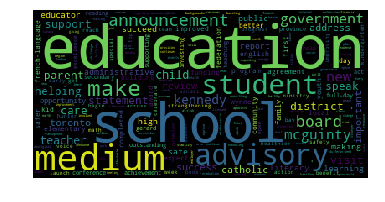

In [229]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Save scraping Data to MySQL Database

In [230]:

df.to_sql(name='news_data', con=engine, if_exists = 'replace', index=False)
rslt.to_sql(name='word_freq', con=engine, if_exists = 'replace', index=False)

## Save scraping Data to MongoDb

In [231]:
import pymongo

conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [233]:
#create db
db = client.schoolDB

#create tables
headlines = db.headlines.find()
wordfreq = db.wordfreq.find()

#populate tables
db.headlines.insert_many(df.to_dict('records'))
db.wordfreq.insert_many(rslt.to_dict('records'))